<a href="https://colab.research.google.com/github/pawel-kowal/SGH_studies/blob/main/data_mining/data_mining_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Prepare the data

### a. Loading libraries

In [1]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 1.0 MB/s eta 0:00:00


In [2]:
import time
import math
import numpy as np
import pandas as pd

import scipy.stats as stats

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, classification_report, average_precision_score,
                            PrecisionRecallDisplay)

import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')

### b. Loding the dataset

In [4]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.iloc[0,:]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let's list different categories within our dataset.

In [7]:
print("""----------------------------------
        Zmienne jakościowe
----------------------------------
""")
print(f"Departamenty: {df.Department.unique()}")
print(f"Częstotliwości podróżowania: {df.BusinessTravel.unique()}")
print(f"Obszary naukowe: {df.EducationField.unique()}")
print(f"Płci: {df.Gender.unique()}")
print(f"Zawody: {df.JobRole.unique()}")
print(f"Stan cywilny: {df.MaritalStatus.unique()}")
print(f"Utrata pracownika: {df.Attrition.unique()}")

----------------------------------
        Zmienne jakościowe
----------------------------------

Departamenty: ['Sales' 'Research & Development' 'Human Resources']
Częstotliwości podróżowania: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Obszary naukowe: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Płci: ['Female' 'Male']
Zawody: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Stan cywilny: ['Single' 'Married' 'Divorced']
Utrata pracownika: ['Yes' 'No']


## 2. Summerize data

## a. Descriptive statistics

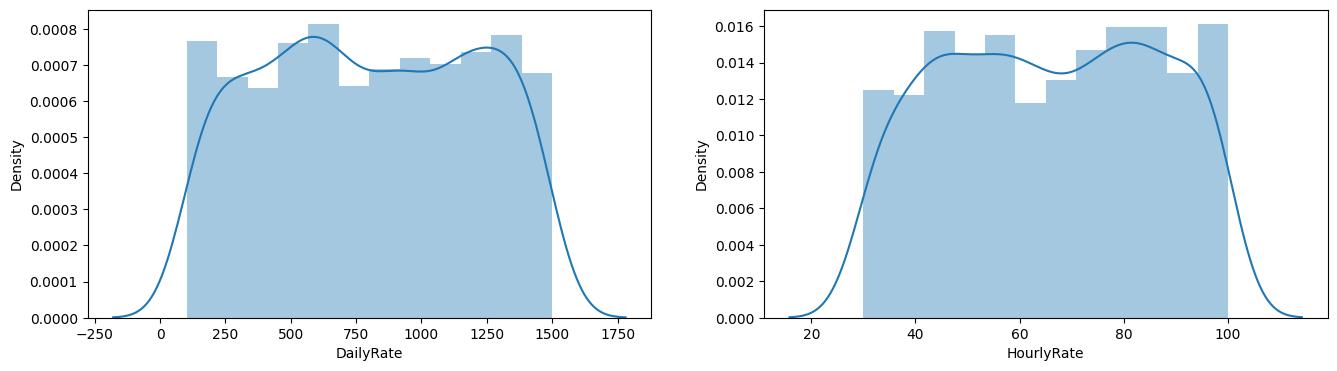

In [8]:
fig, ax = plt.subplots(1,2, figsize = (16,4))
sns.distplot(df['DailyRate'], ax = ax[0])
sns.distplot(df['HourlyRate'], ax = ax[1])
plt.show()

## b. Data visualizatoin

Let's gain some intution about the data, about how the distribution looks for some of the variables. For example how many man/woman leave the company out of how many man/woman in the company.

In [9]:
dfs = df.groupby(['Attrition', 'Gender']).size().reset_index()
dfs

,Attrition,Gender,0
0,No,Female,501
1,No,Male,732
2,Yes,Female,87
3,Yes,Male,150


Now we'll arrang the table above in a more readable format.

In [10]:
df_plot_Gen = df.groupby(['Attrition', 'Gender']).size().reset_index().pivot(columns = 'Attrition', index = 'Gender', values = 0)

print('''
Rozkład odejść ze względu na płeć
''')
df_plot_Gen


Rozkład odejść ze względu na płeć



Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


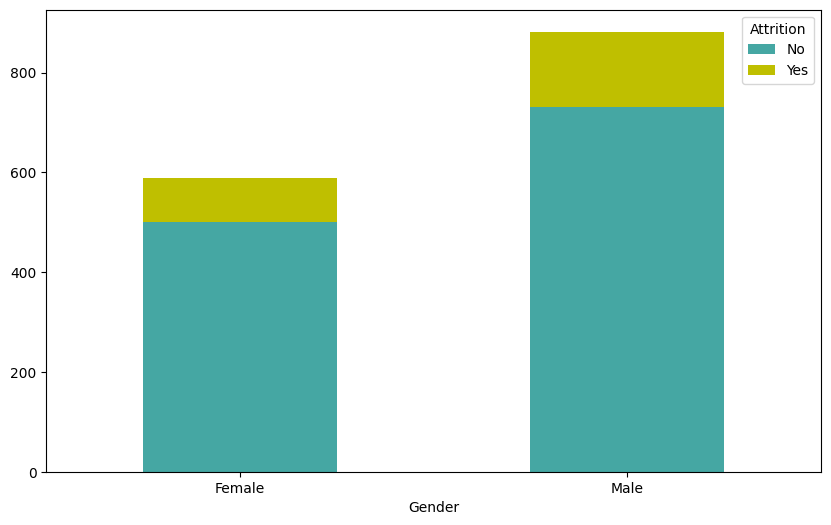

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
df_plot_Gen.plot(kind = 'bar', stacked = True, color = ['#45A7A3','y'], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.savefig('Rozkład zmiennej objaśnianej ze względu na płeć.png')
plt.show()

Lets have a look at the categorical data and their distributions between different categories.

In [12]:
df_plot_Dep = df.groupby(['Attrition', 'Department']).size().reset_index().pivot(columns = 'Attrition', index = 'Department', values = 0)
df_plot_Bus = df.groupby(['Attrition', 'BusinessTravel']).size().reset_index().pivot(columns = 'Attrition', index = 'BusinessTravel', values = 0)
df_plot_Edu = df.groupby(['Attrition', 'EducationField']).size().reset_index().pivot(columns = 'Attrition', index = 'EducationField', values = 0)
df_plot_Job = df.groupby(['Attrition', 'JobRole']).size().reset_index().pivot(columns = 'Attrition', index = 'JobRole', values = 0)
df_plot_Mar = df.groupby(['Attrition', 'MaritalStatus']).size().reset_index().pivot(columns = 'Attrition', index = 'MaritalStatus', values = 0)
df_plot_Env = df.groupby(['Attrition', 'EnvironmentSatisfaction']).size().reset_index().pivot(columns = 'Attrition', index = 'EnvironmentSatisfaction', values = 0)
df_plot_Inv = df.groupby(['Attrition', 'JobInvolvement']).size().reset_index().pivot(columns = 'Attrition', index = 'JobInvolvement', values = 0)
df_plot_Bln = df.groupby(['Attrition', 'WorkLifeBalance']).size().reset_index().pivot(columns = 'Attrition', index = 'WorkLifeBalance', values = 0)
#df_plot_Pro = df.groupby(['Attrition', 'YearsSinceLastPromotion']).size().reset_index().pivot(columns = 'Attrition', index = 'YearsSinceLastPromotion', values = 0)

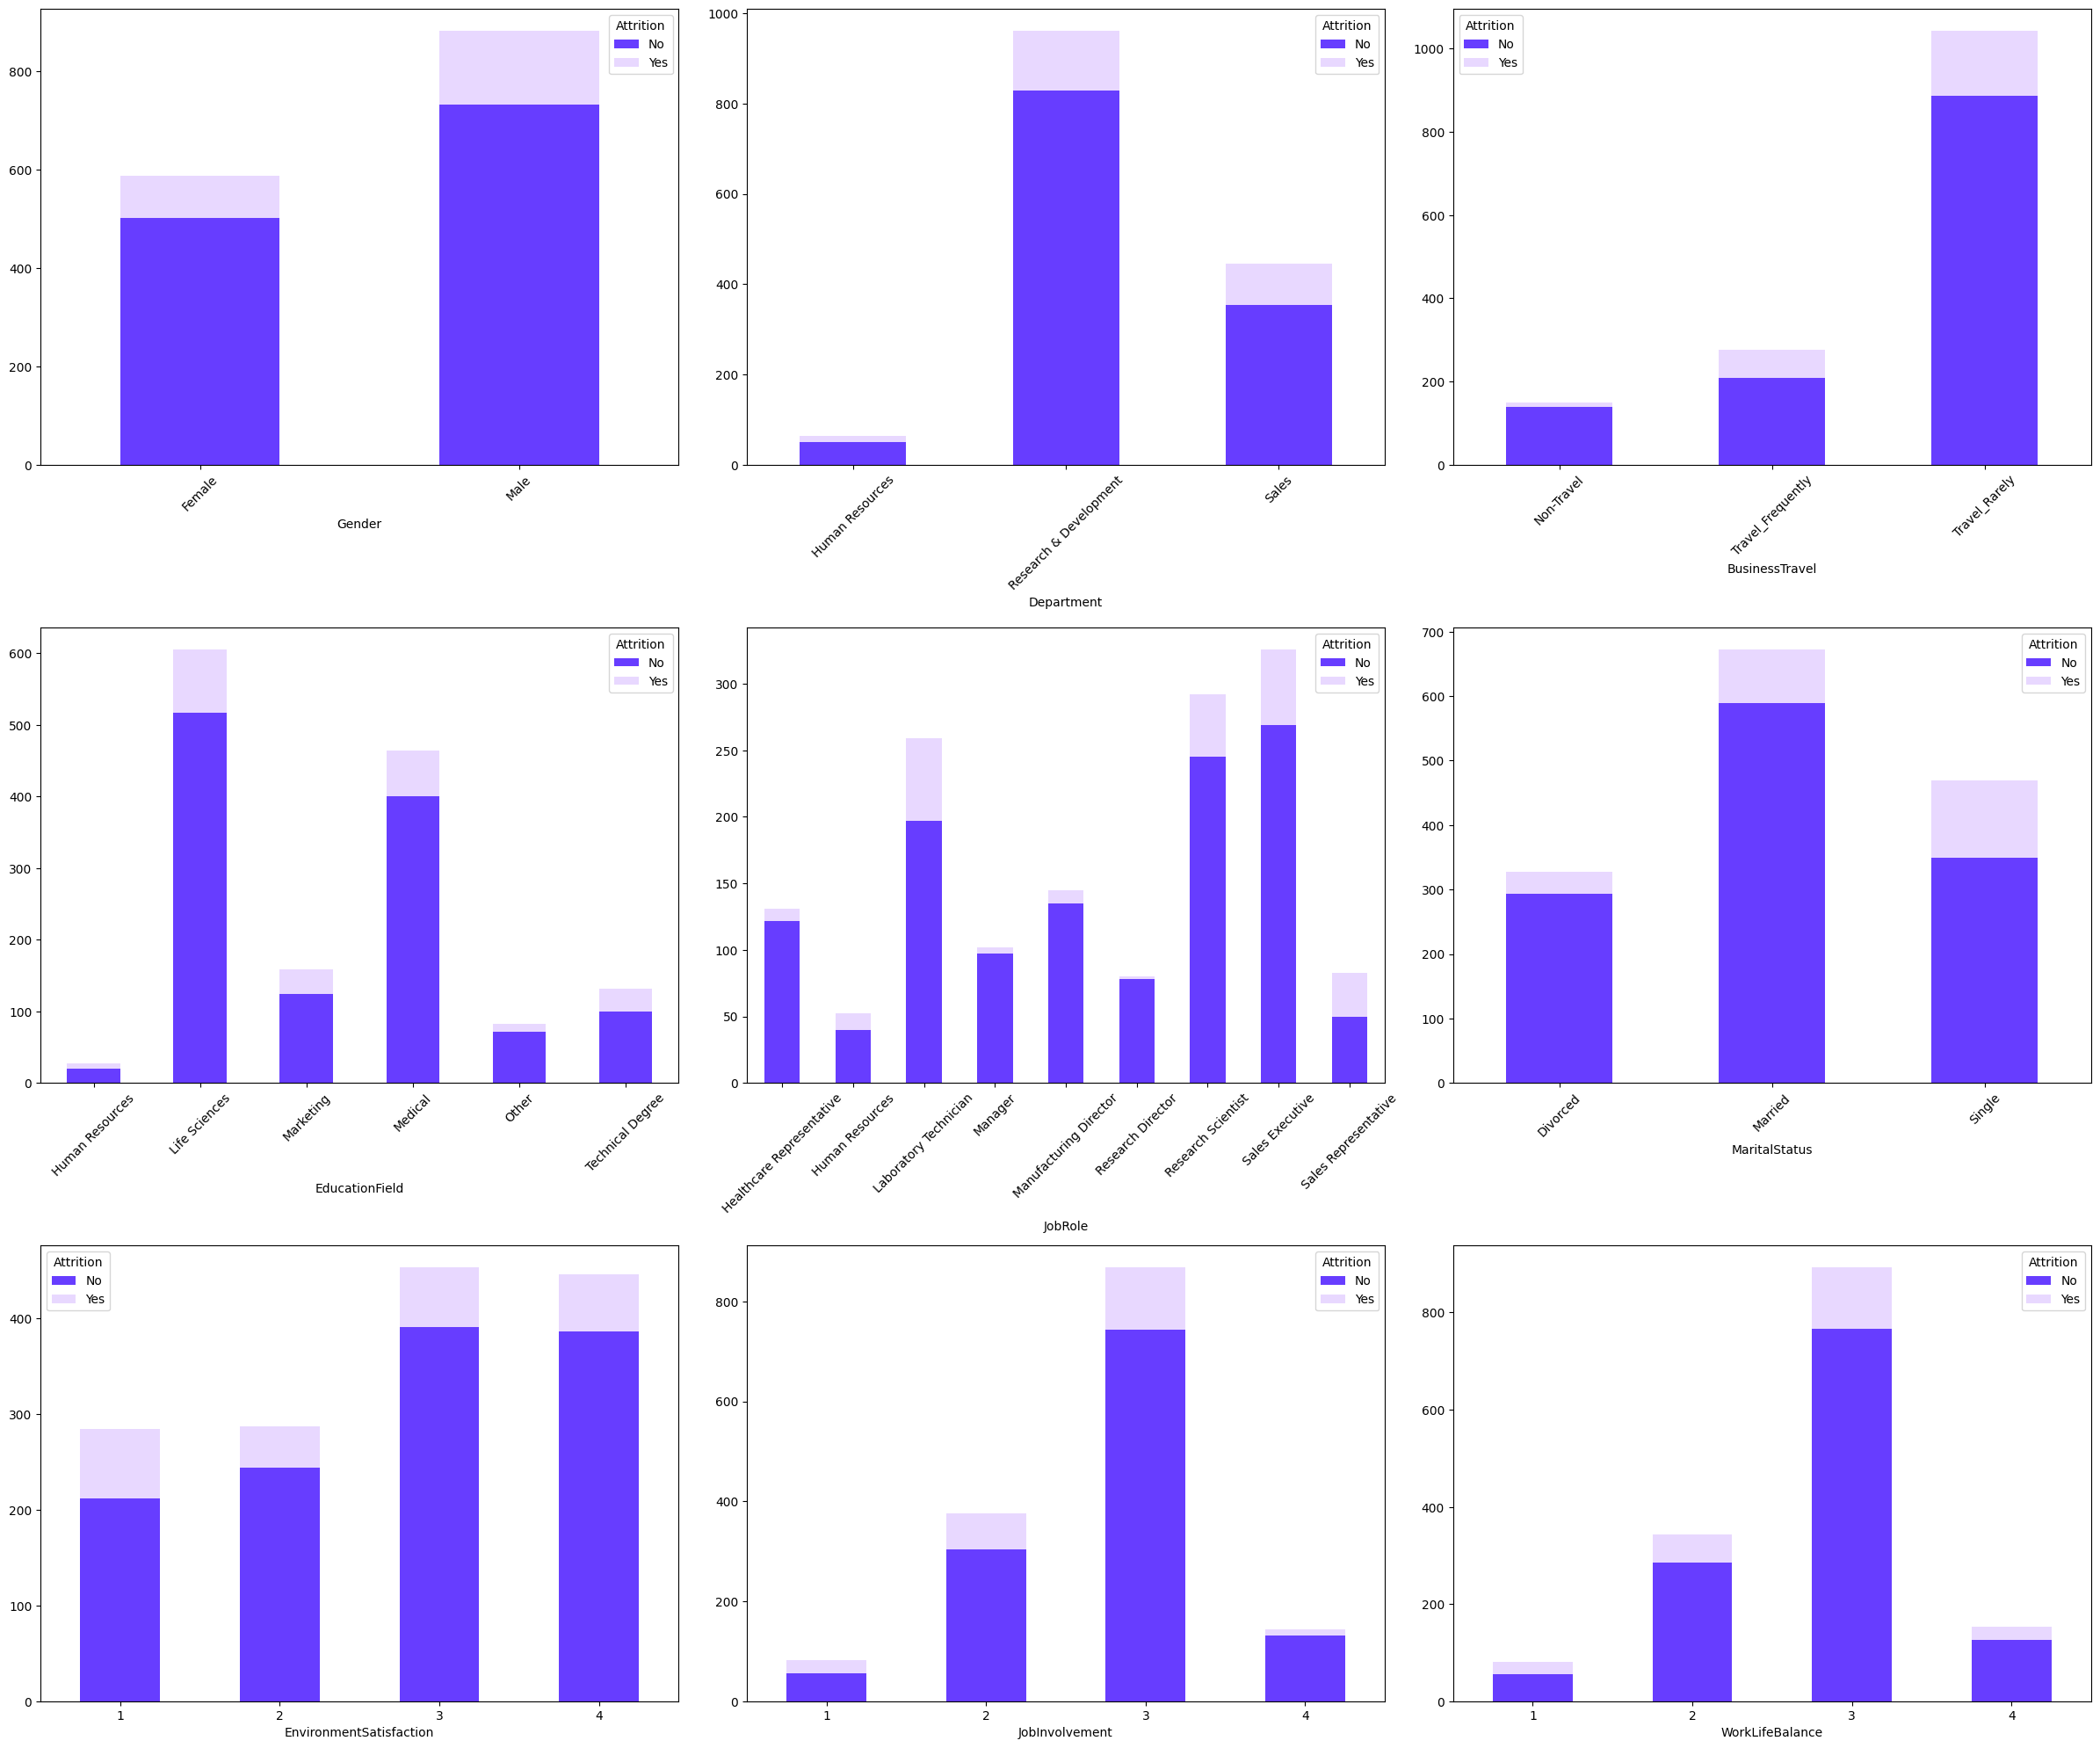

In [13]:
fig, ax = plt.subplots(3, 3, figsize = (24, 20))
c1 = '#673dff'
c2 = '#e8d8ff'

df_plot_Gen.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[0,0])
df_plot_Dep.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[0,1])
df_plot_Bus.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[0,2])
df_plot_Edu.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[1,0])
df_plot_Job.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[1,1])
df_plot_Mar.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[1,2])
df_plot_Env.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[2,0])
df_plot_Inv.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[2,1])
df_plot_Bln.plot(kind = 'bar', stacked = True, color = [c1, c2], ax = ax[2,2])
for i in range(3):
  if i == 2:
    for j in range(3):
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=0)
  else:
    for j in range(3):
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('Rozkłady zmiennej objaśnianej ze względu dane kategoryczne.png')
plt.show()

In [14]:
df_plot_Stock = df.groupby(['MaritalStatus', 'StockOptionLevel']).size().reset_index().pivot(columns = 'StockOptionLevel', index = 'MaritalStatus', values = 0)
df_plot_Stock

StockOptionLevel,0,1,2,3
MaritalStatus,,,,
Divorced,8.0,195.0,75.0,49.0
Married,153.0,401.0,83.0,36.0
Single,470.0,NaN,NaN,NaN


It's interesting to see how attrition changes for some of the numerical variables. We'll plot some of the parameters such as Job level, years in current role, years since last promotion, total working years, years with current manager and hourly rate versus years at the company. We would like to see if staying long in the company affects any of these parameters. and if the patterns are differnet for attrition group vs no attrition.

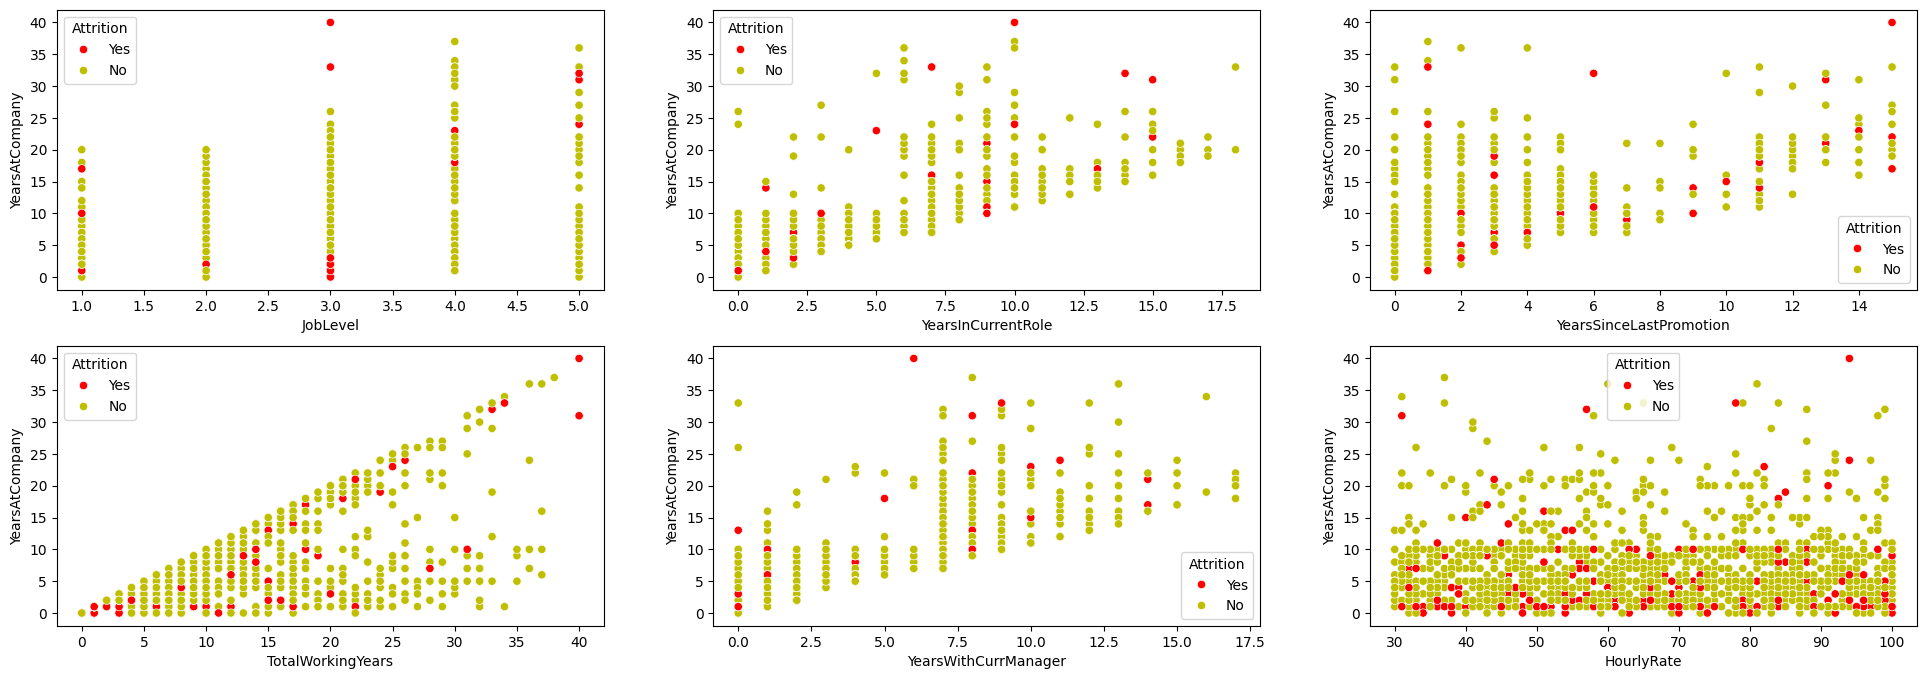

In [15]:
c1 = 'r'
c2 = 'y'
fig, ax = plt.subplots(2, 3, figsize = (24, 8))
sns.scatterplot(data = df, x = "JobLevel", y = "YearsAtCompany", hue="Attrition", palette = [c1, c2], ax = ax[0,0])
sns.scatterplot(data = df, x = "YearsInCurrentRole", y = "YearsAtCompany", hue="Attrition", palette = [c1, c2], ax = ax[0,1])
sns.scatterplot(data = df, x = "YearsSinceLastPromotion", y = "YearsAtCompany", hue="Attrition", palette = [c1, c2], ax = ax[0,2])
sns.scatterplot(data = df, x = "TotalWorkingYears", y = "YearsAtCompany", hue="Attrition", palette = [c1, c2], ax = ax[1,0])
sns.scatterplot(data = df, x = "YearsWithCurrManager", y = "YearsAtCompany", hue="Attrition", palette = [c1, c2], ax = ax[1,1])
sns.scatterplot(data = df, x = "HourlyRate", y = "YearsAtCompany", hue="Attrition", palette = [c1, c2], ax = ax[1,2])
plt.savefig('Wpływ stażu pracy na szanse odejścia.png')
plt.show()

It's hard to find patterns of attrition from the plots above. However, we learn from them that
- the attrition is not directly corrolated with hourly rate. The number of attritions for low hourly rate people is as much as the number of attrition for high hourly rate people.
- It seems that it is not directly corrolated with any of the variables shown above. Since the people with attrition are spread around the whole variable range.

## 3. Prepare Data

## a. Data cleaning

## I. Missing values

In [16]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing data. Data is fairly clean from that aspect!

## II. Outliers

Outliers can affect the performance of the model terribly. Let's see how many outliers we have and try to remove/reduce them. Here the criteria for being an outlier is to be outside the upper and lower limit defined below. To learn more about outliers I recommend you to have a look at [this notebook](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer/notebook).

In [17]:
def qr_outliers(col):
    outliers = []

    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    inter_qr = q3 - q1
    lower_limit = q1 - 1.5 * inter_qr
    upper_limit = q3 + 1.5 * inter_qr
    for val in col:
        if val > upper_limit or val < lower_limit:
            outliers.append(val)
    return outliers

In [18]:
col_outliers = []
for col in df.columns:
    if df[col].dtype == 'O' : continue
    else :
        outliers = qr_outliers(df[col])
        if outliers != []:
            col_outliers.append(col)
            print(col,':' ,outliers)

MonthlyIncome : [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
NumCompaniesWorked : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Perform

Now we check unique values for some of these parameters.

In [19]:
print('NumCompaniesWorked:', df.NumCompaniesWorked.unique())
print('PerformanceRating:', df.PerformanceRating.unique())
print('StockOptionLevel:', df.StockOptionLevel.unique())

NumCompaniesWorked: [8 1 6 9 0 4 5 2 7 3]
PerformanceRating: [3 4]
StockOptionLevel: [0 1 3 2]


Since we have different solutions for handling constant columns versus columns with outliers, we seperate these two. so we store the constant columns in constant_cols and keep the outlier columns in col_outliers.

In [20]:
constant_cols = col_outliers[1:4]
col_outliers[1:4] = []
col_outliers

['MonthlyIncome',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [21]:
def box_plot_outliers(cols, df):
    fig, ax = plt.subplots(7,2, figsize = (8, 15))

    i = 0
    j = 0
    for col in cols:
        #print(col)
        sns.boxplot(df[col], ax = ax[i, j])

        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel(col)
        j += 1

        df.loc[df[col] > 0, col], fitted_lambda = stats.boxcox(df[df[col] > 0][col], lmbda = None)
        sns.boxplot(df[col], ax = ax[i, j], color = '#FEE23E')
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        i += 1
        j -= 1

    fig.suptitle('Przed i po transformacji Box-Coxa w celu usunięcia wartości odstających', fontsize = 12)
    fig.subplots_adjust(top = 0.98)
    fig.tight_layout()
    plt.savefig('Przed i po transformacji Box-Coxa w celu usunięcia wartości odstających.png')
    plt.show()

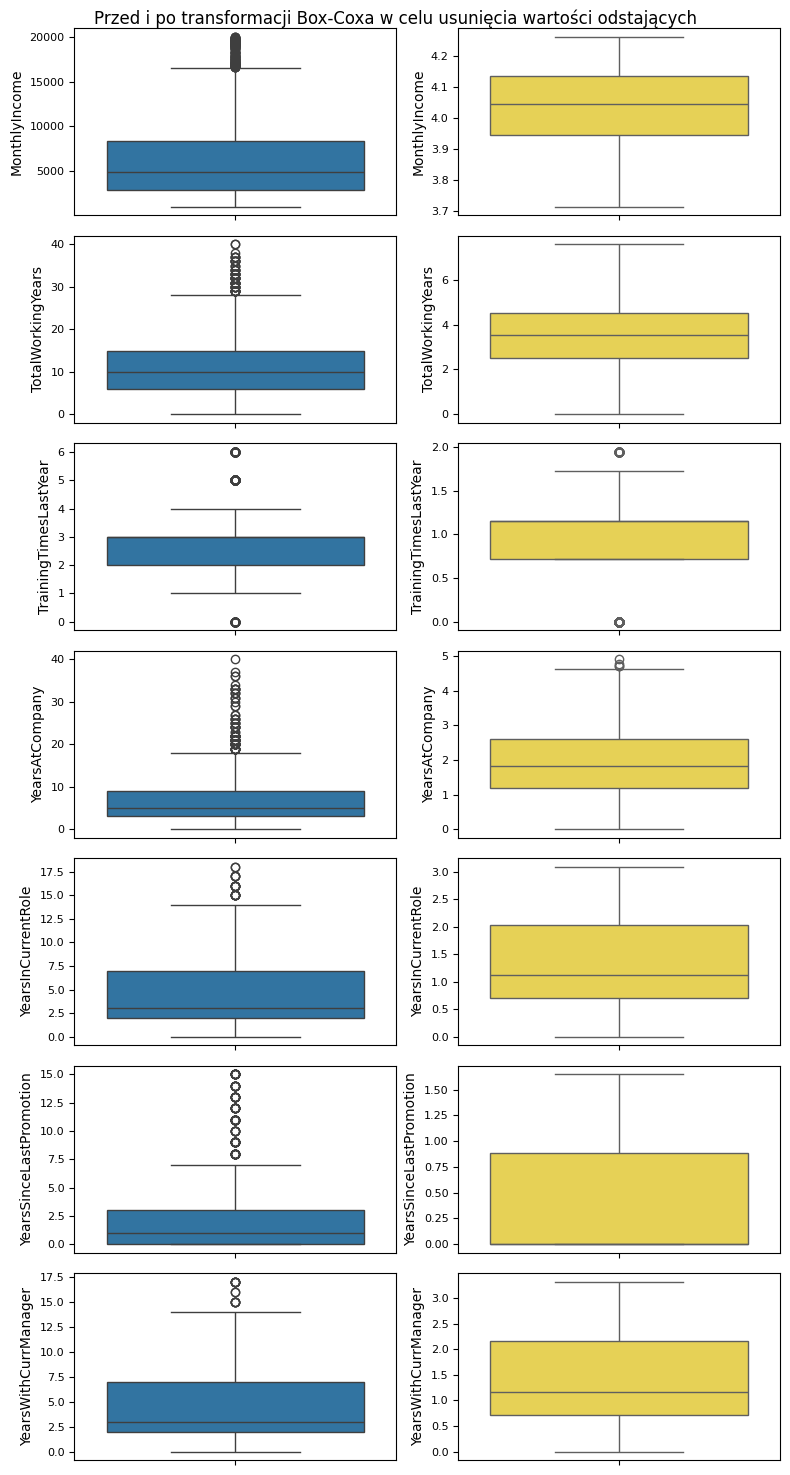

In [22]:
box_plot_outliers(col_outliers, df)

As you can see in yellow plots above, the columns are cleaned from outliers and the distribution becomes smoother for them.

In [23]:
def constant_cols_outliers(cols, df):
    fig, ax = plt.subplots(3,2, figsize = (8, 5))

    i = 0
    j = 0
    for col in cols:
        #print(col)

        sns.distplot(df[col], ax = ax[i, j])
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel(col)
        j += 1

        if col == 'NumCompaniesWorked':
            df.loc[df[col] == 9, col] = np.mean(df[col])
        elif col == 'PerformanceRating':
            df.loc[df[col] == 4, col] = np.mean(df[col])
        else:
            df.loc[df[col] == 3, col] = np.mean(df[col])

        sns.distplot(df[col], ax = ax[i, j], color = 'y')
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        i += 1
        j -= 1

    fig.suptitle('Przed i po imputacji średnią w celu usunięcia wartości odstających stałych wartości', fontsize = 12)
    fig.subplots_adjust(top = 0.98)
    fig.tight_layout()
    plt.savefig('Przed i po imputacji średnią w celu usunięcia wartości odstających stałych wartości.png')
    plt.show()

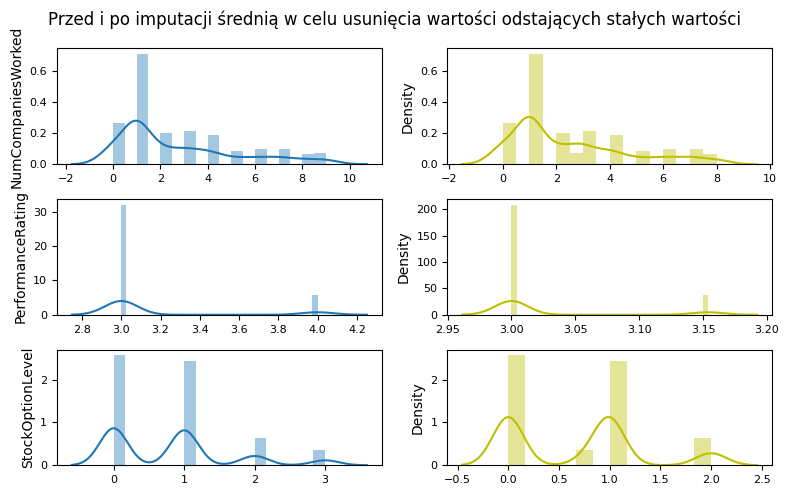

In [24]:
constant_cols_outliers(constant_cols, df)

## III. Preprocessing and Encoding Categorical Columns

We use lanbel encoder to change the categorical data into numerical for simplicity. However, the algorithm might misunderstand the data. Since sequencing the categories doesn't mean any relationship between different categories. If the categories were something like low, medium and hight, then using label encoder would be reasonable. as there is a sequence relaitonship between these category values. but for categories such as HR, sales and R&D there is no such a relationship.
Another option would be to try the encoding with one-hot-vector. The problem with one-hoe-encoder is that it introduces a lot of columns to the data with value zeros causing sparsity. To avoid this problem, I chose the label encoding for this problem.

In [25]:
#onehotenc = OneHotEncoder()
#dep = pd.DataFrame(onehotenc.fit_transform(df[['Department']]).toarray())
#df = df.drop('Department', axis = 1).join(dep)
#df.head()

In [26]:
%%time
#onehotenc = OneHotEncoder()
labelenc = LabelEncoder()
df['Attrition'] = labelenc.fit_transform(df['Attrition'])
df['Department'] = labelenc.fit_transform(df['Department'])
df['EducationField'] = labelenc.fit_transform(df['EducationField'])
df['Gender'] = labelenc.fit_transform(df['Gender'])
df['JobRole'] = labelenc.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelenc.fit_transform(df['MaritalStatus'])
df['BusinessTravel'] = labelenc.fit_transform(df['BusinessTravel'])
df['OverTime'] = labelenc.fit_transform(df['OverTime'])

CPU times: user 7.47 ms, sys: 0 ns, total: 7.47 ms
Wall time: 7.69 ms


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   int64  
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## IV. Removing constant columns

We still have some categorical column. lets look what values it take.

In [28]:
print(df.Over18.unique())
print(df.EmployeeCount.unique())
print(df.StandardHours.unique())

['Y']
[1]
[80]


In [29]:
df.EmployeeNumber.unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

Only one value. So we'll remove it!

In [30]:
df.drop('Over18', axis = 1, inplace = True)
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)

## c. Feature Correlations

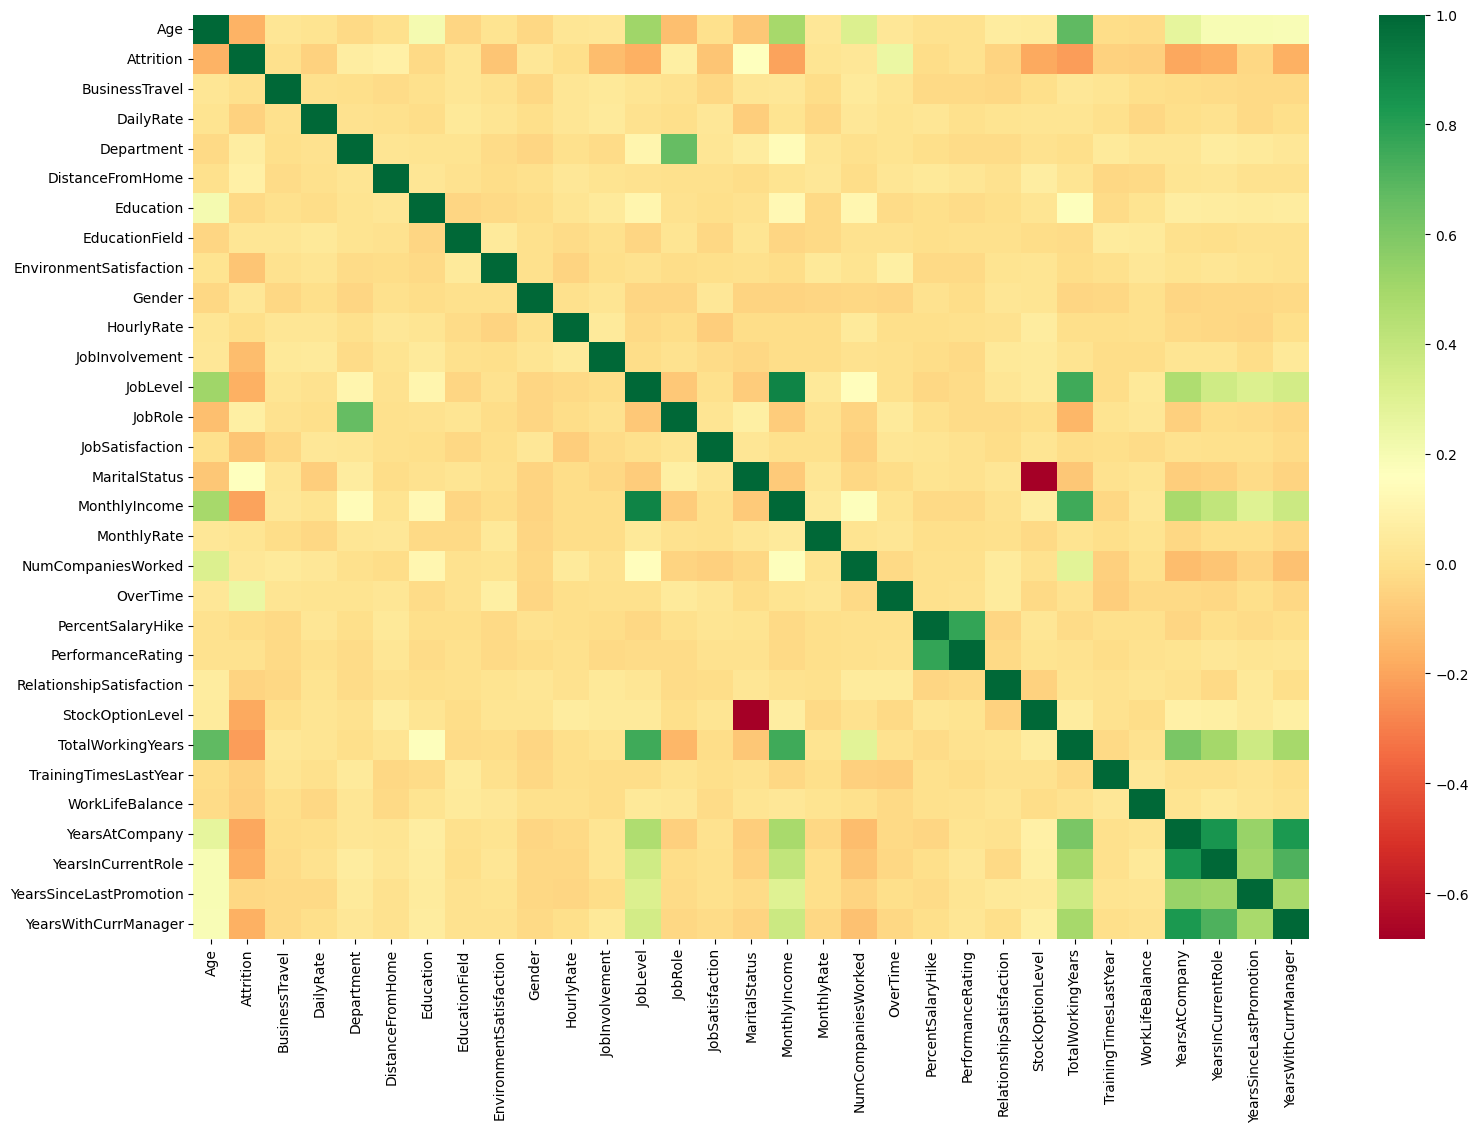

In [31]:
fig, ax = plt.subplots(1,1, figsize = (18,12))
sns.heatmap(df.corr(), cmap = 'RdYlGn')
plt.savefig('Korelacje.png')
plt.show()

From the corrolation plot we learn:
- Attrition has negative corrolation with monthly income, total working years, Stock option Level, years at company, years in current role, years with current manager, job satisfactoin, job involvement, environment satisfaction and age. <br>
- Attrition has positive corrolation only with over time and no other parameter. <br>
- There is a high corrolation between Percent salary hike and performance rating as well as job Level and monthly income. <br>
- Stock otpion has strong negative corrolation with Marital Status. I will take a barplot to have a closer look on how they relate out of personal curiosity! <br>
- Years at company, years in current role, years since last promotion, years with current manager, total working years, monthly income and job level are also corrolated. <br>

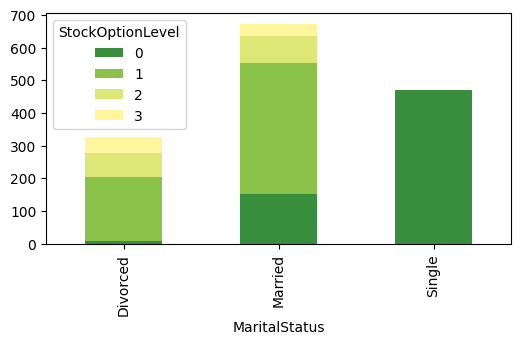

In [32]:
fig, ax = plt.subplots(figsize = (6,3))
df_plot_Stock.plot(kind = 'bar', stacked = True, color = ['#388E3C','#8BC34A','#DCE775', '#FFF59D'], ax = ax)
# plt.legend(labels = 'StockOptionLevel')
plt.savefig('')
plt.show()

Spliting data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition', axis = 1), df.Attrition)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1102, 30)
X_test shape: (368, 30)
y_train shape: (1102,)
y_test shape: (368,)


In [34]:
classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       318
           1       0.65      0.26      0.37        50

    accuracy                           0.88       368
   macro avg       0.77      0.62      0.65       368
weighted avg       0.86      0.88      0.86       368



In [35]:
print(f'score(X_test, y_test) dla najlepszego modelu: {best_rf.score(X_test, y_test)}')

score(X_test, y_test) dla najlepszego modelu: 0.8804347826086957


## b. Precision Recall Curve

For imbalanced data, precision-recall curve is a good metric for comparing the performance of model. However, roc curve is not a good metric for imbalanced data. <br> To learn more about roc-curve and precision-recall curve you can check [roc curves vs precision recall curves](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)<br>
[This notebook](https://www.kaggle.com/lct14558/imbalanced-data-why-you-should-not-use-roc-curve) explains why you should not use roc-curve and rely on precision recall curve instead.


In [36]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
print(precisions, recalls, thresholds)

[0.13586957 0.65       1.        ] [1.   0.26 0.  ] [0 1]


Average precision recall score for Random Forest classifier: 53.3


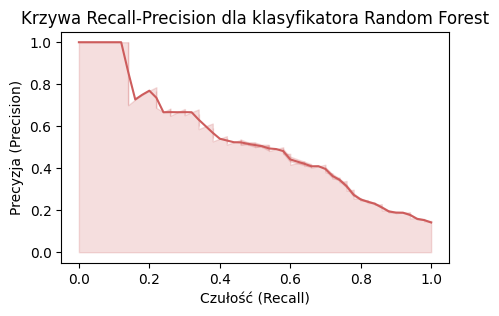

In [37]:
fig, ax = plt.subplots(figsize = (5,3))
color = 'indianred'

y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

AP_score = average_precision_score(y_test, y_pred_proba)
print('Average precision recall score for Random Forest classifier: %.1f' % (AP_score * 100))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

color = 'indianred'

sns.lineplot(x=recall, y=precision, ax=ax, color=color)
ax.fill_between(recall, precision, 0, alpha=0.2, color=color)

ax.set_xlabel('Czułość (Recall)')
ax.set_ylabel('Precyzja (Precision)')
ax.set_title('Krzywa Recall-Precision dla klasyfikatora Random Forest')
plt.savefig("Krzywa Recall-Precision dla klasyfikatora Random Forest.png")
plt.show()

In [38]:
import tensorflow as tf
# y_train_tf = tf.keras.utils.to_categorical(y_train, num_classes=2)
# y_test_tf = tf.keras.utils.to_categorical(y_test, num_classes=2)

scaler = StandardScaler()
X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 2s 19ms/step - loss: 411.0983 - accuracy: 0.6799 - val_loss: 234.6920 - val_accuracy: 0.7919
Epoch 2/100
28/28 [==============================] - 0s 6ms/step - loss: 314.6591 - accuracy: 0.7401 - val_loss: 114.7060 - val_accuracy: 0.7919
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 231.4445 - accuracy: 0.7287 - val_loss: 27.2943 - val_accuracy: 0.7919
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 143.1261 - accuracy: 0.7378 - val_loss: 15.8231 - val_accuracy: 0.7919
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 125.8042 - accuracy: 0.7469 - val_loss: 12.0262 - val_accuracy: 0.7919
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 92.6624 - accuracy: 0.7423 - val_loss: 3.5258 - val_accuracy: 0.7919
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 60.4729 - accuracy: 0.7548 - val_loss: 0.7891 - val_accuracy: 

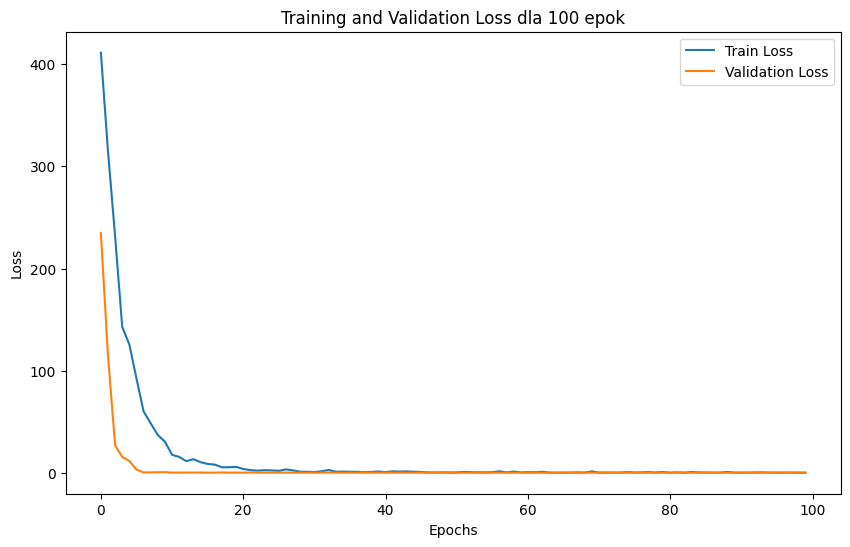

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss dla 100 epok')
plt.legend()
plt.savefig('Training and Validation Loss dla 100 epok.png')
plt.show()

Epoch 1/30
28/28 [==============================] - 1s 11ms/step - loss: 512.8786 - accuracy: 0.7355 - val_loss: 234.4452 - val_accuracy: 0.7919
Epoch 2/30
28/28 [==============================] - 0s 4ms/step - loss: 365.1438 - accuracy: 0.7367 - val_loss: 125.3205 - val_accuracy: 0.7919
Epoch 3/30
28/28 [==============================] - 0s 3ms/step - loss: 279.8800 - accuracy: 0.7299 - val_loss: 63.2610 - val_accuracy: 0.7919
Epoch 4/30
28/28 [==============================] - 0s 5ms/step - loss: 214.4926 - accuracy: 0.7310 - val_loss: 12.3699 - val_accuracy: 0.7919
Epoch 5/30
28/28 [==============================] - 0s 4ms/step - loss: 178.6785 - accuracy: 0.7015 - val_loss: 15.5995 - val_accuracy: 0.7919
Epoch 6/30
28/28 [==============================] - 0s 4ms/step - loss: 123.7515 - accuracy: 0.7230 - val_loss: 18.5489 - val_accuracy: 0.7919
Epoch 7/30
28/28 [==============================] - 0s 4ms/step - loss: 81.4010 - accuracy: 0.7083 - val_loss: 9.7046 - val_accuracy: 0.791

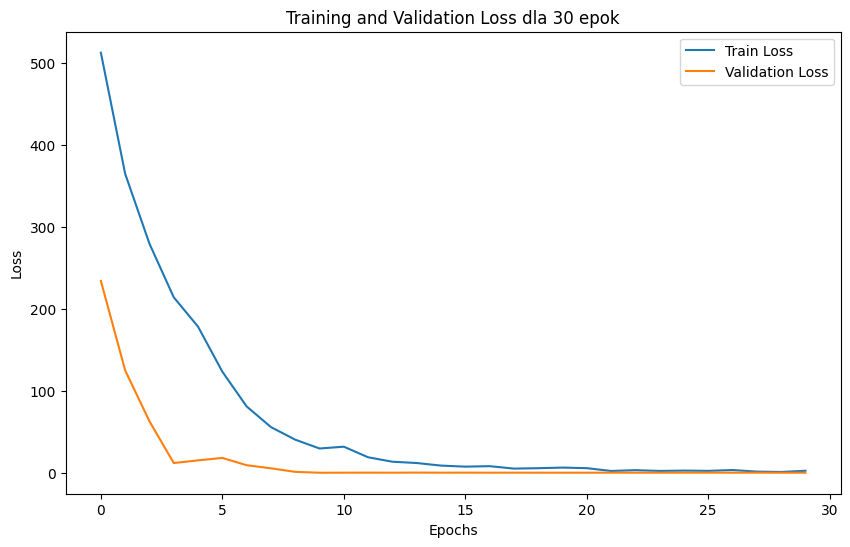

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss dla 30 epok')
plt.legend()
plt.savefig('Training and Validation Loss dla 30 epok.png')
plt.show()

In [43]:
y_pred_proba_tf = model.predict(X_test).ravel()

12/12 [==============================] - 0s 3ms/step


In [44]:
y_pred_tf = (y_pred_proba_tf >= 0.3).astype(int)

In [45]:
AP_score_tf = average_precision_score(y_test, y_pred_proba_tf)
print('Average precision recall score for Neural Network classifier: %.1f' % (AP_score_tf * 100))

Average precision recall score for Neural Network classifier: 15.8


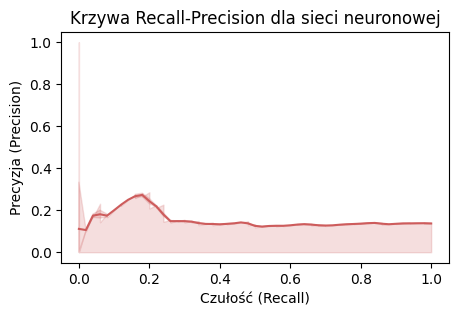

In [46]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_tf)

fig, ax = plt.subplots(figsize=(5, 3))
color = 'indianred'

sns.lineplot(x=recall, y=precision, ax=ax, color=color)
ax.fill_between(recall, precision, 0, alpha=0.2, color=color)

ax.set_xlabel('Czułość (Recall)')
ax.set_ylabel('Precyzja (Precision)')
ax.set_title('Krzywa Recall-Precision dla sieci neuronowej')
plt.savefig("Krzywa Recall-Precision dla sieci neuronowej.png")
plt.show()

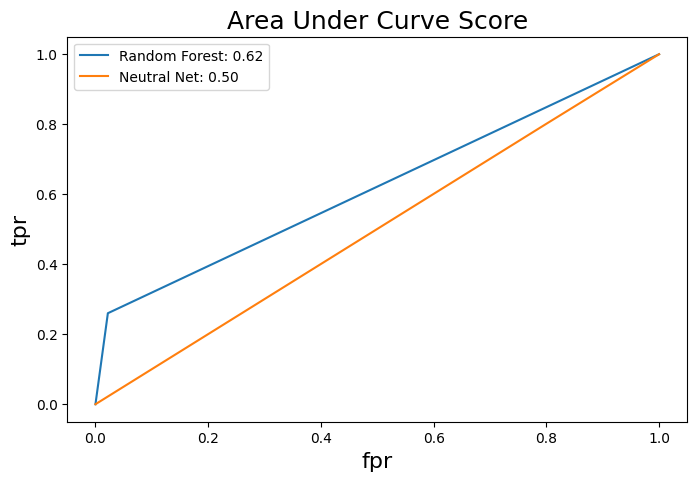

CPU times: user 359 ms, sys: 50.7 ms, total: 410 ms
Wall time: 426 ms


In [47]:
%%time
fig, ax = plt.subplots(figsize = (8,5))
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
ax.plot(fpr, tpr, label = ('Random Forest: %.2f' %(auc_score)))

fpr, tpr, threshold = roc_curve(y_test, y_pred_tf)
auc_score = roc_auc_score(y_test, y_pred_tf)
ax.plot(fpr, tpr, label = ('Neutral Net: %.2f' %(auc_score)))
ax.legend()
ax.set_xlabel('fpr', fontsize = 16)
ax.set_ylabel('tpr', fontsize = 16)
ax.set_title('Area Under Curve Score', fontsize = 18)
plt.show()